In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files

In [3]:
file = files.upload()

Saving Foreign_Exchange_Rates.csv to Foreign_Exchange_Rates.csv


In [5]:
#Reading csv file
import io 
data = pd.read_csv(io.BytesIO(file['Foreign_Exchange_Rates.csv']),index_col=[1],parse_dates=[1])

In [6]:
#Data Preparation
data = data[-261:]

In [7]:
ASD = data[['AUSTRALIA - AUSTRALIAN DOLLAR/US$']]

In [8]:
ASD

,AUSTRALIA - AUSTRALIAN DOLLAR/US$
Time Serie,
2019-01-01,ND
2019-02-01,1.4286
2019-03-01,1.4257
2019-04-01,1.4069
2019-07-01,1.4
...,...
2019-12-25,ND
2019-12-26,1.4411
2019-12-27,1.4331


In [9]:
ASD.loc[ASD['AUSTRALIA - AUSTRALIAN DOLLAR/US$'] == 'ND'] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
ASD = ASD.squeeze()

In [11]:
ASD

Time Serie
2019-01-01         0
2019-02-01    1.4286
2019-03-01    1.4257
2019-04-01    1.4069
2019-07-01       1.4
               ...  
2019-12-25         0
2019-12-26    1.4411
2019-12-27    1.4331
2019-12-30    1.4278
2019-12-31    1.4225
Name: AUSTRALIA - AUSTRALIAN DOLLAR/US$, Length: 261, dtype: object

In [12]:
ASD = pd.to_numeric(ASD)

In [13]:
print(ASD)

Time Serie
2019-01-01    0.0000
2019-02-01    1.4286
2019-03-01    1.4257
2019-04-01    1.4069
2019-07-01    1.4000
               ...  
2019-12-25    0.0000
2019-12-26    1.4411
2019-12-27    1.4331
2019-12-30    1.4278
2019-12-31    1.4225
Name: AUSTRALIA - AUSTRALIAN DOLLAR/US$, Length: 261, dtype: float64


In [17]:
ASD.describe()

count    261.000000
mean       1.435938
std        0.031566
min        1.373000
25%        1.409800
50%        1.437600
75%        1.461100
max        1.493000
Name: AUSTRALIA - AUSTRALIAN DOLLAR/US$, dtype: float64

In [18]:
Assigning Null values with average
ASD.loc[ASD == 0] = 1.373

In [19]:
ASD

Time Serie
2019-01-01    1.3730
2019-02-01    1.4286
2019-03-01    1.4257
2019-04-01    1.4069
2019-07-01    1.4000
               ...  
2019-12-25    1.3730
2019-12-26    1.4411
2019-12-27    1.4331
2019-12-30    1.4278
2019-12-31    1.4225
Name: AUSTRALIA - AUSTRALIAN DOLLAR/US$, Length: 261, dtype: float64

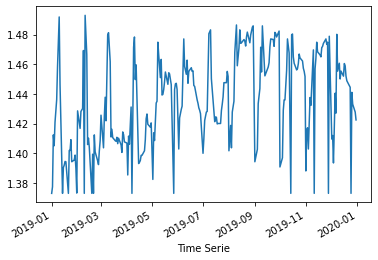

In [20]:
ASD.plot()

In [22]:
ASD_mean = ASD.rolling(window = 20).mean()

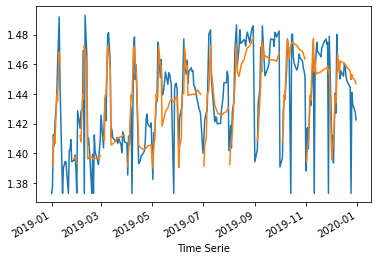

In [23]:
#Moving average as well as normal average
ASD.plot()
ASD_mean.plot()

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


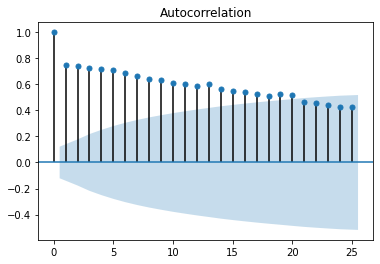

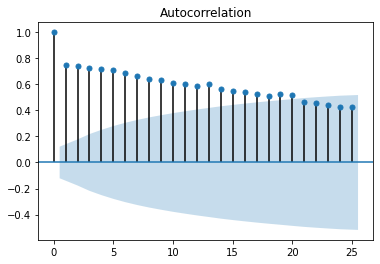

In [29]:
#parameters for ARIMA model
#For q
plot_acf(ASD)


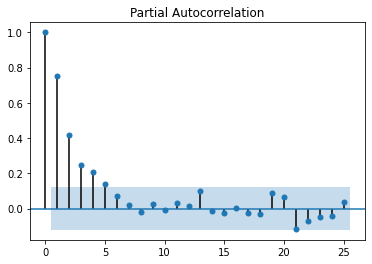

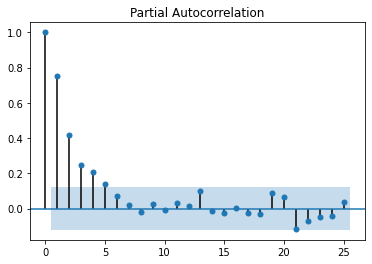

In [30]:
#for p
plot_pacf(ASD)

In [31]:
ASD.size

261

In [33]:
#Spitting Test and Train Data
Train_ASD = ASD[0:182]
Test_ASD = ASD[182:261]

In [34]:
Train_ASD

Time Serie
2019-01-01    1.3730
2019-02-01    1.4286
2019-03-01    1.4257
2019-04-01    1.4069
2019-07-01    1.4000
               ...  
2019-05-09    1.4663
2019-06-09    1.4586
2019-09-09    1.4548
2019-10-09    1.4560
2019-11-09    1.4582
Name: AUSTRALIA - AUSTRALIAN DOLLAR/US$, Length: 182, dtype: float64

In [35]:
Test_ASD

Time Serie
2019-12-09    1.4554
2019-09-13    1.4522
2019-09-16    1.4567
2019-09-17    1.4582
2019-09-18    1.4611
               ...  
2019-12-25    1.3730
2019-12-26    1.4411
2019-12-27    1.4331
2019-12-30    1.4278
2019-12-31    1.4225
Name: AUSTRALIA - AUSTRALIAN DOLLAR/US$, Length: 79, dtype: float64

In [36]:
print(Train_ASD.size)
print(Test_ASD.size)

182
79


In [37]:
#Modelling
from statsmodels.tsa.arima_model import ARIMA

In [38]:
ASD_model = ARIMA(Train_ASD,order=(20,0,5))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [39]:
#Fitting the model with train data
ASD_model_fit = ASD_model.fit() 


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: Converge

In [44]:
#Calculating AIC value
ASD_model_fit.aic

-958.4791290669107

In [45]:
#Forecasting the values
ASD_forecast = ASD_model_fit.forecast(steps = 79)[0]

In [46]:

ASD_forecast

array([1.44429729, 1.44524352, 1.46720767, 1.44558515, 1.46288321,
       1.46937649, 1.45075841, 1.45901404, 1.45204978, 1.45139912,
       1.45593778, 1.44542318, 1.44575573, 1.45483628, 1.44511955,
       1.44772773, 1.4547289 , 1.4463526 , 1.45389391, 1.45396407,
       1.44758578, 1.45369165, 1.44858376, 1.44317191, 1.44897732,
       1.443467  , 1.44084437, 1.4469265 , 1.44289047, 1.4437878 ,
       1.44853743, 1.44429197, 1.4464752 , 1.44806178, 1.44347908,
       1.44459435, 1.44413709, 1.43991887, 1.44116334, 1.44036596,
       1.43858524, 1.44041002, 1.44039073, 1.44029813, 1.44196501,
       1.44142359, 1.44141943, 1.44122414, 1.44005862, 1.43920853,
       1.43805443, 1.43698487, 1.43670613, 1.43568385, 1.4361434 ,
       1.43648741, 1.43621722, 1.43724875, 1.43754191, 1.43672297,
       1.43747026, 1.43648043, 1.43520432, 1.43527104, 1.4339708 ,
       1.43280499, 1.43345489, 1.43247417, 1.43243962, 1.43344999,
       1.4330492 , 1.43317296, 1.43404869, 1.43305913, 1.43290

In [47]:
Test_ASD.index

DatetimeIndex(['2019-12-09', '2019-09-13', '2019-09-16', '2019-09-17',
               '2019-09-18', '2019-09-19', '2019-09-20', '2019-09-23',
               '2019-09-24', '2019-09-25', '2019-09-26', '2019-09-27',
               '2019-09-30', '2019-01-10', '2019-02-10', '2019-03-10',
               '2019-04-10', '2019-07-10', '2019-08-10', '2019-09-10',
               '2019-10-10', '2019-11-10', '2019-10-14', '2019-10-15',
               '2019-10-16', '2019-10-17', '2019-10-18', '2019-10-21',
               '2019-10-22', '2019-10-23', '2019-10-24', '2019-10-25',
               '2019-10-28', '2019-10-29', '2019-10-30', '2019-10-31',
               '2019-01-11', '2019-04-11', '2019-05-11', '2019-06-11',
               '2019-07-11', '2019-08-11', '2019-11-11', '2019-12-11',
               '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-18',
               '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22',
               '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-28',
      

In [48]:
New_data = pd.Series(ASD_forecast, index=Test_ASD.index)

In [51]:
New_data

Time Serie
2019-12-09    1.444297
2019-09-13    1.445244
2019-09-16    1.467208
2019-09-17    1.445585
2019-09-18    1.462883
                ...   
2019-12-25    1.432908
2019-12-26    1.432802
2019-12-27    1.431543
2019-12-30    1.430957
2019-12-31    1.430832
Length: 79, dtype: float64

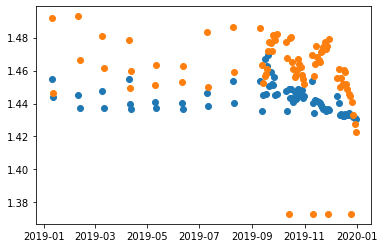

In [52]:
#Scatter plot for Test values and forecasted values
plt.scatter(New_data.index,New_data)
plt.scatter(Test_ASD.index,Test_ASD)

In [114]:
#Evaluating RMSE
np.sqrt(mean_squared_error(Test_ASD,ASD_forecast))

0.028180763545483403

In [115]:
#Evaluating Mean Absolute Error
mean_absolute_error(Test_ASD,ASD_forecast)

0.024120601622742068

In [116]:
#Mean Absolute Percentage Error
np.mean(np.abs((Test_ASD-ASD_forecast)/Test_ASD)*100)

1.657641082041345